In [1]:

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
df = pd.read_csv('FINAL_UPGRADE.csv')

In [2]:
df.columns

Index(['t', 'L', 'lineno', 'T12VPhaseA', 'T12VPhaseB', 'T12VPhaseC',
       'T12IPhaseA', 'T12IPhaseB', 'T12IPhaseC', 'T13VPhaseA', 'T13VPhaseB',
       'T13VPhaseC', 'T13IPhaseA', 'T13IPhaseB', 'T13IPhaseC', 'T23VPhaseA',
       'T23VPhaseB', 'T23VPhaseC', 'T23IPhaseA', 'T23IPhaseB', 'T23IPhaseC',
       'T24VPhaseA', 'T24VPhaseB', 'T24VPhaseC', 'T24IPhaseA', 'T24IPhaseB',
       'T24IPhaseC', 'T25VPhaseA', 'T25VPhaseB', 'T25VPhaseC', 'T25IPhaseA',
       'T25IPhaseB', 'T25IPhaseC', 'T34VPhaseA', 'T34VPhaseB', 'T34VPhaseC',
       'T34IPhaseA', 'T34IPhaseB', 'T34IPhaseC', 'T45VPhaseA', 'T45VPhaseB',
       'T45VPhaseC', 'T45IPhaseA', 'T45IPhaseB', 'T45IPhaseC',
       'LineResistance', 'LineInductance', 'typeoffault', 'typeoffault_n'],
      dtype='object')

In [3]:

X = df.drop(['t', 'lineno', 'typeoffault', 'typeoffault_n', 'T12VPhaseA', 'T12VPhaseB', 'T12VPhaseC',
       'T13VPhaseA', 'T13VPhaseB', 'T13VPhaseC', 'T23VPhaseA', 'T23VPhaseB', 'T23VPhaseC',
       'T24VPhaseA', 'T24VPhaseB', 'T24VPhaseC', 'T25VPhaseA', 'T25VPhaseB', 'T25VPhaseC', 'T34VPhaseA', 'T34VPhaseB', 'T34VPhaseC',
       'T45VPhaseA', 'T45VPhaseB', 'T45VPhaseC'], axis='columns')
y = df['typeoffault_n']

In [4]:
df.loc[(df.typeoffault_n == 5),'typeoffault_n']=500
df.typeoffault_n.unique()
df.loc[(df.typeoffault_n == 0),'typeoffault_n']=5
df.loc[(df.typeoffault_n == 500),'typeoffault_n']=0

In [5]:
df.loc[(df.lineno==1),'lineno']=13
df.loc[(df.lineno==2),'lineno']=17
df.loc[(df.lineno==3),'lineno']=19
df.loc[(df.lineno==4),'lineno']=23
df.loc[(df.lineno==5),'lineno']=29
df.loc[(df.lineno==6),'lineno']=31
df.loc[(df.lineno==7),'lineno']=37

In [6]:
df['linenno_typeoffault_n']=df['typeoffault_n']*df['lineno']

In [7]:
print(len(df['linenno_typeoffault_n'].unique())) # should give 36

36


In [8]:
targets = df['linenno_typeoffault_n']

In [9]:
le = LabelEncoder()
targets = le.fit_transform(targets)

In [10]:
targets = pd.DataFrame(data=targets)

In [11]:
X = RobustScaler().fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, targets, test_size=0.2)

In [13]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

1621620 405405 1621620 405405


In [14]:
knn = KNeighborsClassifier(n_neighbors=13)

In [15]:
y_train = np.reshape(y_train,(1621620,))
y_test = np.reshape(y_test,(405405,))

In [16]:
knn.fit(X_train, y_train)

C:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=13)

In [17]:
knn.score(X_test[:100], y_test[:100])

0.96

In [18]:
arr1 = [0, 65, 85, 95, 115, 145, 155, 185, 17, 13, 19, 23, 29, 31, 37, 26, 34, 38, 46, 58, 62, 74, 39, 51, 57, 69, 87, 93, 111, 52, 68, 76, 92, 116, 124, 148]
arr2 = [0, 18, 23, 27, 29, 32, 34, 35,      2,  1,  3,  4,  6,  7,  9,  5,  8, 10, 12, 16, 17, 21, 11, 13, 15, 20, 24, 26, 28, 14, 19, 22, 25, 30, 31, 33]

In [19]:
output = {}

In [20]:
output = {
    "0": "NO Fault",
    "18":"Line 1 LG Fault",
    "23":"Line 2 LG Fault",
    "27":"Line 3 LG Fault",
    "29":"Line 4 LG Fault",
    "32":"Line 5 LG Fault",
    "34":"Line 6 LG Fault",
    "35":"Line 7 LG Fault",
    "1":"Line 1 LL Fault",
    "2":"Line 2 LL Fault",
    "3":"Line 3 LL Fault",
    "4":"Line 4 LL Fault",
    "6":"Line 5 LL Fault",
    "7":"Line 6 LL Fault",
    "9":"Line 7 LL Fault",
    "5":"Line 1 LLG Fault",
    "8":"Line 2 LLG Fault",
    "10":"Line 3 LLG Fault",
    "12":"Line 4 LLG Fault",
    "16":"Line 5 LLG Fault",
    "17":"Line 6 LLG Fault",
    "21":"Line 7 LLG Fault",
    "11":"Line 1 LLL Fault",
    "13":"Line 2 LLL Fault",
    "15":"Line 3 LLL Fault",
    "20":"Line 4 LLL Fault",
    "24":"Line 5 LLL Fault",
    "26":"Line 6 LLL Fault",
    "28":"Line 7 LLL Fault",
    "14":"Line 1 LLLG Fault",
    "19":"Line 2 LLLG Fault",
    "22":"Line 3 LLLG Fault",
    "25":"Line 4 LLLG Fault",
    "30":"Line 5 LLLG Fault",
    "31":"Line 6 LLLG Fault",
    "33":"Line 7 LLLG Fault"
}

In [21]:
y_pred = knn.predict(X_test[:100])

In [24]:
r = pd.DataFrame(y_pred)

In [28]:
r[0].unique()

array([ 0, 13, 16, 35, 18, 29,  2, 33, 32, 15, 30, 31,  4, 17,  6, 12,  3,
       11,  8, 34, 10,  9, 20, 23,  7,  5], dtype=int64)

In [31]:
for i in r[0].head():
    temp = str(i)
    print(output[temp])

NO Fault
NO Fault
NO Fault
Line 2 LLL Fault
NO Fault


Text(114.0, 0.5, 'Truth')

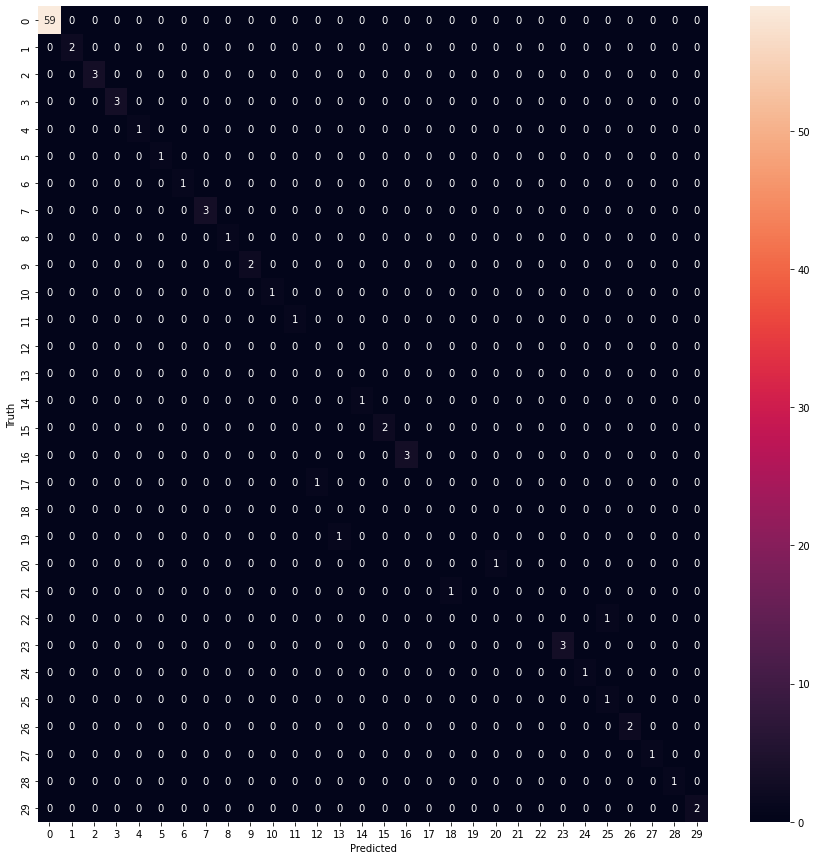

In [36]:
cm = confusion_matrix(y_test[:100], y_pred[:100])
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(15,15))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')